In [1]:
import os
import matplotlib.pyplot as plt 

print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SPACEL/SPACEL-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径

D:\bio\jupyter_code\LICA
D:\bio\SPACEL\SPACEL-main


In [2]:
datasets = ["HCC-5A","HCC-5B","HCC-5C","HCC-5D"]
sample_name = 'LICA'
input_dir = 'G:/dataset/LICA/input/'
output_dir = 'G:/dataset/LICA/output/SPACEL/'

In [3]:
import SPACEL.Splane.utils
import pandas as pd
import scanpy as sc

for dataset in datasets:
    adata = sc.read_visium(input_dir + dataset)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata_label = pd.read_csv(input_dir + dataset + '/' + 'truth.csv')
    adata_label = adata_label[['batch', 'celltype']]
    adata_label.rename(columns={'celltype': 'spatial_domain'}, inplace=True)
    SPACEL.Splane.utils.add_cell_type_composition(adata, adata_label)
    adata.uns['celltypes'] = adata.uns['celltypes'].tolist()
    print(adata.isbacked)
    adata.filename = output_dir + 'SPACEL_' + dataset + '.h5ad'
    print(adata.isbacked)


# adata = sc.read_h5ad('D:/dataset/151508/SPACEL_151508.h5ad')
# print(adata)
# print(adata.obs)


D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


False
True


D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


False
True


D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


False
True


D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


False
True


In [4]:
import scanpy as sc
import pandas as pd
adata_list = []
for dataset in datasets:
    path = output_dir + 'SPACEL_' + dataset + '.h5ad'
    print(path)
    adata_list.append(sc.read_h5ad(path))


G:/dataset/LICA/output/SPACEL/SPACEL_HCC-5A.h5ad
G:/dataset/LICA/output/SPACEL/SPACEL_HCC-5B.h5ad
G:/dataset/LICA/output/SPACEL/SPACEL_HCC-5C.h5ad
G:/dataset/LICA/output/SPACEL/SPACEL_HCC-5D.h5ad


## Pairwise alignment
Here, we perform pairwise alignment of slices. The cluster_key is a column of .obs which contain spatial domain information used for alignment. The n_neighbors affect how much neighbors are considered when calculate similarity of two slices. The knn_exclude_cutoff affect max distance of neighbors. By default, knn_exclude_cutoff = n_neighbors, which means a spot/cell in source slices consider knn_exclude_cutoff neighbors in target slices, and neighbor will be exclude when the distance of neighbors larger than the median of neareast knn_exclude_cutoff + n_neighbors neighbors distance in all spot/cell in target slice. p affect the exponent of overlap penalty, and a larger p means stronger partial alignment capability.

In [5]:
from SPACEL import Scube
Scube.align(adata_list,
  cluster_key='spatial_domain', 
  n_neighbors = 4, 
  p=1,
  write_loc_path = output_dir + sample_name + '_aligned_coordinates.csv'
 )

# sc.concat(adata_list).write('../data/ST_mouse_brain/mouse_brain_st.h5ad')

D:\anaconda\envs\SPACEL\lib\site-packages\linear_operator\utils\deprecation.py:13: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:77.)
  bool_compat = (torch.ones(1) > 0).dtype


Start alignment...
Alignment slice 1 to 0
Alignment slice 2 to 1
Alignment slice 3 to 2
Runtime: 452.5221893787384 s


In [6]:
adata_list[0]
adata_list[1]

AnnData object with n_obs × n_vars = 3958 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'spatial_domain'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'celltypes', 'spatial'
    obsm: 'spatial', 'spatial_pair', 'spatial_aligned'

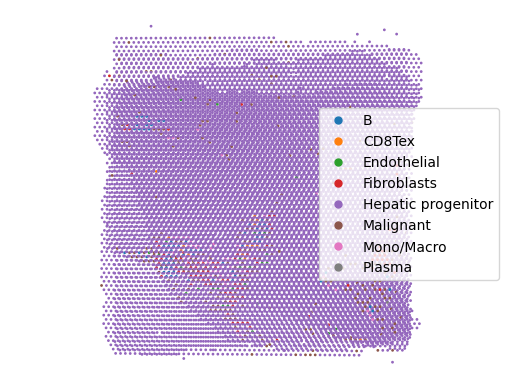

In [7]:
Scube.plot_stacked_slices(adata_list,spatial_key='spatial',cluster_key='spatial_domain')
plt.savefig(output_dir + sample_name + "_spatial.png", dpi=300)

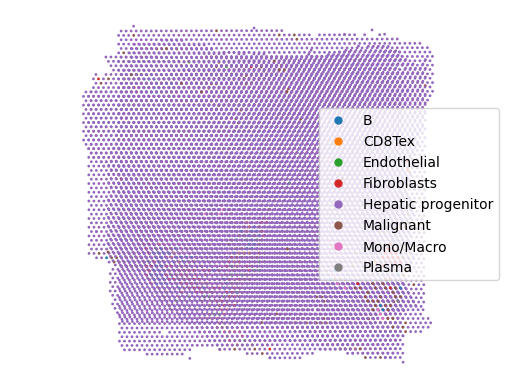

In [8]:
Scube.plot_stacked_slices(adata_list,spatial_key='spatial_pair',cluster_key='spatial_domain')
plt.savefig(output_dir + sample_name + "_spatial_pair.png", dpi=300)

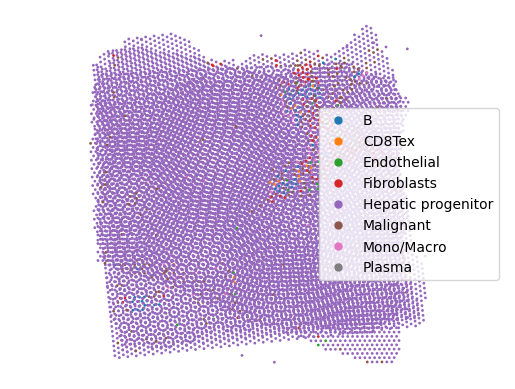

In [9]:
Scube.plot_stacked_slices(adata_list,spatial_key='spatial_aligned',cluster_key='spatial_domain')
plt.savefig(output_dir + sample_name + "_spatial_aligned.png", dpi=300)

D:\bio\SPACEL\SPACEL-main\SPACEL\Scube\plot.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(loc[:,0], loc[:,1], loc[:,2],c=color,*args,**kwargs)


G:/dataset/LICA/output/SPACEL/LICA_spatial_aligned_3d.png


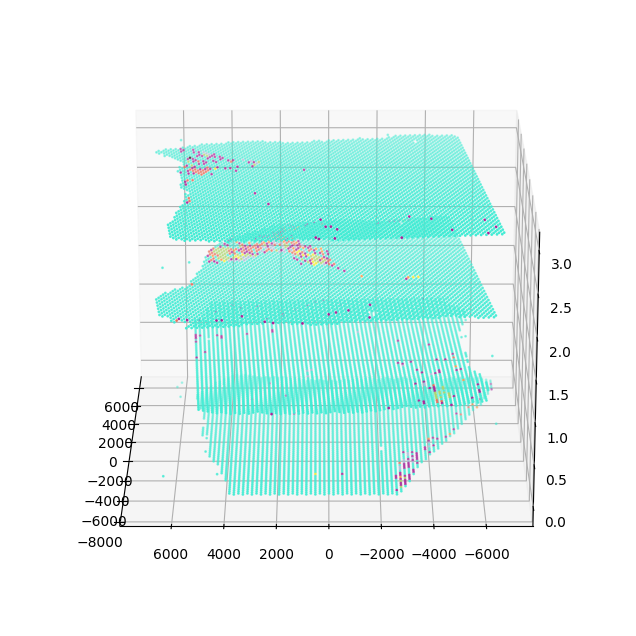

In [12]:
coo = pd.DataFrame()
for i in range(len(adata_list)):
    loc = adata_list[i].obsm['spatial_aligned'].copy()
    loc['Z'] = i
    loc['celltype_colors'] = adata_list[i].obs['spatial_domain'].replace(dict(zip(['B','CD8Tex','Endothelial','Fibroblasts','Hepatic progenitor','Malignant','Mono/Macro', 'Plasma'],['#aad466', '#f4ed27','#f9973f','#e76f5a','#40ecd4', '#a62098', '#a4bcda', '#000000'])))
    coo = pd.concat([coo,loc],axis=0)
path = output_dir + sample_name + "_spatial_aligned_3d.png"
Scube.plot_3d(coo.values[:,:3],val=None,color=coo['celltype_colors'],show=True,elev=20,azim=180,s=1,save_path=path, save_dpi=300)

In [13]:
for i in range(len(adata_list)):
    adata = adata_list[i]
    dataset = datasets[i]
    print(adata.isbacked)
    adata.filename = output_dir + 'SPACEL_aligned_' + dataset + '.h5ad'
    print(adata.isbacked)

False
True
False
True
False
True
False
True
